
# Submission Machine Learning Pemula

    Nama : Fandi Meylwan Hasnur
    Username : fhasnur
    Email : fandi.hasnur10@gmail.com


In [ ]:
# import tensorflow dan menampilkan versinya
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.4.1


In [ ]:
# download dataset
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O rockpaperscissors.zip

--2021-04-09 23:41:13--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.39MB/s    in 51s     

2021-04-09 23:42:05 (6.00 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile, os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# download split folder untuk split dataset
!pip install split_folders

In [ ]:
import splitfolders

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', '/tmp/rockpaperscissors/data', seed=1, ratio=(0.6, 0.4))

Copying files: 2188 files [00:00, 3863.74 files/s]


In [ ]:
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

os.listdir('/tmp/rockpaperscissors/data/train')
os.listdir('/tmp/rockpaperscissors/data/val')

['scissors', 'rock', 'paper']

In [ ]:
# membuat direktori data training'
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori data training
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./225,
                    shear_range=0.2,
                    zoom_range=0.2,
                    rotation_range=30,
                    horizontal_flip=True)

test_datagen = ImageDataGenerator(
                    rescale=1./225,
                    shear_range=0.2,
                    zoom_range=0.2,
                    rotation_range=30,
                    horizontal_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_directory(
          train_dir,
          target_size=(150, 150),
          batch_size=32,
          color_mode='rgb',
          class_mode='categorical',
          shuffle = True, 
          seed=42)
          
validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          color_mode='rgb',
          class_mode='categorical',
          shuffle = True, 
          seed=42)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
 
#  lihat semua lapisan jaringan menggunakan metode summary model
model.summary()

NameError: ignored

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
tf.keras.backend.clear_session() # docs : https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session

In [ ]:
# latih model dengan model.fit
history = model.fit(
      train_generator,
      steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/20
25/25 [==============================] - 44s 2s/step - loss: 1.2120 - accuracy: 0.3496 - val_loss: 1.0672 - val_accuracy: 0.3375
Epoch 2/20
25/25 [==============================] - 42s 2s/step - loss: 0.9923 - accuracy: 0.4993 - val_loss: 0.6994 - val_accuracy: 0.7688
Epoch 3/20
25/25 [==============================] - 42s 2s/step - loss: 0.5933 - accuracy: 0.7741 - val_loss: 0.3833 - val_accuracy: 0.8500
Epoch 4/20
25/25 [==============================] - 43s 2s/step - loss: 0.4464 - accuracy: 0.8454 - val_loss: 0.3933 - val_accuracy: 0.8813
Epoch 5/20
25/25 [==============================] - 43s 2s/step - loss: 0.4419 - accuracy: 0.8300 - val_loss: 0.3089 - val_accuracy: 0.8813
Epoch 6/20
25/25 [==============================] - 42s 2s/step - loss: 0.3023 - accuracy: 0.8894 - val_loss: 0.3245 - val_accuracy: 0.8813
Epoch 7/20
25/25 [==============================] - 42s 2s/step - loss: 0.2745 - accuracy: 0.9049 - val_loss: 0.2433 - val_accuracy: 0.9062
Epoch 8/20
25/25 [==

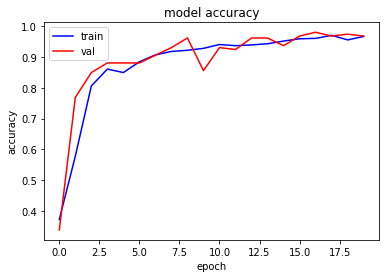

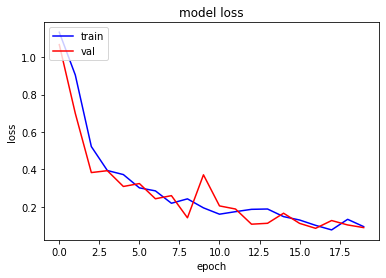

In [ ]:
# plot untuk melihat akurasi model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving paper.png to paper.png
PAPER


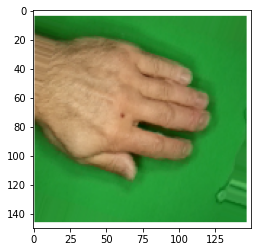

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path =fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
 
  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  else:
    print('SCISSORS')